# 1. Crear repositorio

Creo repositorio.

Corrijo que funcione el ignore para que no se suba el csv de mi cliente.

# 2. Importar
Importar librerías y el cvs de ventas.

In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
v = pd.read_csv('Ventas.csv', encoding= 'ISO-8859-1',sep=';')

# 3. Explorar CSV

In [4]:
v.head()


,Diario,Da de la Semana,Mes,Pedidos,Facturacin,Ingreso neto,Coste producto,Coste envo y embalaje,Coste forma de pago,Beneficio,...,x3,Trfico ADS Espaa,Trfico ADS Portugal,Trfico ADS Francia,Trfico ADS Italia,Trfico ADS UK,Trfico ADS IE,Trfico ADS Mxico,Trfico ADS Chile,Trfico TOTAL ADS EroticFeel
0,01/01/2022,sbado,enero,62,"3.240,86","2.650,79","1.436,20","351,99","49,75","810,06",...,x,729.000,174.0,98.0,178.0,63.0,50.0,465.0,100.0,1857
1,02/01/2022,domingo,enero,99,"5.665,29","4.727,17","2.711,51","484,61","77,95","1.453,10",...,x,1.000,233.0,115.0,204.0,75.0,63.0,421.0,175.0,2286
2,03/01/2022,lunes,enero,165,"8.575,63","7.037,96","3.877,56","748,99","101,05","2.300,06",...,x,1.034,247.0,127.0,220.0,69.0,50.0,677.0,242.0,2666
3,04/01/2022,martes,enero,125,"5.925,75","4.882,08","2.697,36","672,86","81,46","1.421,27",...,x,1.098,266.0,118.0,191.0,62.0,50.0,580.0,201.0,2566
4,05/01/2022,mircoles,enero,96,"5.430,73","4.512,06","2.561,30","487,38","79,91","1.374,89",...,x,810.000,215.0,130.0,182.0,78.0,42.0,379.0,178.0,2014


In [5]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Diario                        365 non-null    object 
 1   Da de la Semana              365 non-null    object 
 2   Mes                           365 non-null    object 
 3   Pedidos                       365 non-null    int64  
 4   Facturacin                   365 non-null    object 
 5   Ingreso neto                  365 non-null    object 
 6   Coste producto                365 non-null    object 
 7   Coste envo y embalaje        365 non-null    object 
 8   Coste forma de pago           365 non-null    object 
 9   Beneficio                     365 non-null    object 
 10  Carrito Medio                 365 non-null    object 
 11  Coste Producto Medio          365 non-null    object 
 12  B¼ por Venta                  365 non-null    object 
 13  x    

In [6]:
v.shape

(365, 43)

In [7]:
v.columns

Index(['Diario', 'Da de la Semana', 'Mes', 'Pedidos', 'Facturacin',
       'Ingreso neto', 'Coste producto', 'Coste envo y embalaje',
       'Coste forma de pago', 'Beneficio', 'Carrito Medio',
       'Coste Producto Medio', 'B¼ por Venta', 'x', 'Trfico Espaa',
       'Trfico Portugal', 'Trfico Francia', 'Trfico Italia', 'Trfico UK',
       'Trfico IE', 'Trfico Mxico', 'Trfico Chile', 'Trfico TOTAL', 'x2',
       'Coste ADS Espaa', 'Coste ADS Portugal', 'Coste ADS Francia',
       'Coste ADS Italia', 'Coste ADS UK', 'Coste ADS IE', 'Coste ADS Mxico',
       'Coste ADS Chile', 'TOTAL Coste ADS EroticFeel', 'x3',
       'Trfico ADS Espaa', 'Trfico ADS Portugal', 'Trfico ADS Francia',
       'Trfico ADS Italia', 'Trfico ADS UK', 'Trfico ADS IE',
       'Trfico ADS Mxico', 'Trfico ADS Chile',
       'Trfico TOTAL ADS EroticFeel'],
      dtype='object')

In [8]:
v.describe()

,Pedidos,Trfico Espaa,Trfico Portugal,Trfico Francia,Trfico Italia,Trfico UK,Trfico IE,Trfico Mxico,Trfico Chile,Trfico TOTAL,...,TOTAL Coste ADS EroticFeel,Trfico ADS Espaa,Trfico ADS Portugal,Trfico ADS Francia,Trfico ADS Italia,Trfico ADS UK,Trfico ADS IE,Trfico ADS Mxico,Trfico ADS Chile,Trfico TOTAL ADS EroticFeel
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,365.000000
mean,38.767123,339.155666,204.323288,106.841096,115.397260,89.819178,47.594521,368.956608,114.202740,2.275756,...,301.484981,301.710947,102.977778,27.152778,41.133333,32.316667,18.869444,241.525000,71.366667,885.638356
std,22.932366,402.927901,113.996721,51.901978,66.243544,68.574858,27.314207,211.386865,70.092227,0.905103,...,233.617140,227.117882,69.544395,42.959675,71.044135,59.888101,17.556662,206.314184,62.789333,653.269895
min,10.000000,1.000000,52.000000,30.000000,27.000000,29.000000,10.000000,1.012000,20.000000,1.026000,...,1.005000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,1.270000,95.000000,66.000000,68.000000,49.000000,28.000000,188.000000,44.000000,1.657000,...,145.000000,119.750000,27.750000,1.000000,1.000000,1.000000,3.000000,63.000000,5.000000,450.000000
50%,33.000000,2.175000,195.000000,91.000000,100.000000,59.000000,42.000000,340.000000,119.000000,1.905000,...,216.000000,274.000000,103.000000,5.000000,3.000000,2.000000,17.500000,208.500000,76.000000,663.000000
75%,44.000000,769.000000,263.000000,147.000000,131.000000,97.000000,61.000000,490.000000,163.000000,2.622000,...,358.000000,401.250000,149.500000,24.250000,14.500000,6.500000,33.000000,354.500000,113.000000,997.000000
max,165.000000,991.000000,560.000000,257.000000,328.000000,347.000000,273.000000,915.000000,416.000000,5.212000,...,999.000000,996.000000,305.000000,191.000000,243.000000,236.000000,68.000000,904.000000,372.000000,2684.000000


In [9]:
v[sorted(v.columns)]

,Beneficio,B¼ por Venta,Carrito Medio,Coste ADS Chile,Coste ADS Espaa,Coste ADS Francia,Coste ADS IE,Coste ADS Italia,Coste ADS Mxico,Coste ADS Portugal,...,Trfico IE,Trfico Italia,Trfico Mxico,Trfico Portugal,Trfico TOTAL,Trfico TOTAL ADS EroticFeel,Trfico UK,x,x2,x3
0,"810,06","13,07","52,27",NaN,271,53,NaN,61,135,80,...,77,230,559.0,267,3.086,1857,120,x,x,x
1,"1.453,10","14,68","57,23",NaN,370,63,NaN,70,124,124,...,101,273,572.0,410,4.112,2286,173,x,x,x
2,"2.300,06","13,94","51,97",NaN,370,68,NaN,77,194,133,...,76,291,843.0,505,4.944,2666,188,x,x,x
3,"1.421,27","11,37","47,41",NaN,374,55,NaN,66,181,131,...,74,263,744.0,476,4.443,2566,167,x,x,x
4,"1.374,89","14,32","56,57",NaN,284,75,NaN,67,94,89,...,68,255,532.0,437,3.857,2014,171,x,x,x
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,"720,25","16,37","55,12",NaN,84,3,NaN,0,160,76,...,41,150,501.0,330,2.687,0,61,x,x,x
361,"629,37","17,98","51,40",NaN,89,2,NaN,0,194,63,...,43,147,697.0,308,2.667,0,67,x,x,x
362,"392,90","14,03","50,11",NaN,81,5,NaN,0,92,45,...,32,155,394.0,252,2.210,0,58,x,x,x
363,"686,92","21,47","75,39",NaN,81,4,NaN,0,59,54,...,21,141,345.0,263,2.123,0,75,x,x,x


# 4. Limpiar

In [10]:
# elimino todas las filas vacias (0)

v = v.dropna(how='all')

v.shape


(365, 43)

In [11]:
# elimino columnas vacías (2)

v = v.dropna(axis=1, how='all')
v.shape

(365, 41)

No hay filas vacías


In [12]:
# elimino columnas que todo el contenido es una "x" (3)
def all_x(col):
    return all(val == 'x' for val in col)

v.drop(v.columns[v.apply(all_x)], axis=1, inplace=True)

v.shape

(365, 38)

In [13]:
# me hago un dataframe solo con lo que me interesa

v2 = v[['Diario', 'Da de la Semana', 'Mes', 'Pedidos', 'Facturacin',
       'Ingreso neto', 'Coste producto', 'Coste envo y embalaje',
       'Coste forma de pago', 'Beneficio', 'Carrito Medio',
       'Coste Producto Medio', 'B¼ por Venta']]

In [14]:
v2.shape

(365, 13)

In [15]:
v2.head()

,Diario,Da de la Semana,Mes,Pedidos,Facturacin,Ingreso neto,Coste producto,Coste envo y embalaje,Coste forma de pago,Beneficio,Carrito Medio,Coste Producto Medio,B¼ por Venta
0,01/01/2022,sbado,enero,62,"3.240,86","2.650,79","1.436,20","351,99","49,75","810,06","52,27","23,16","13,07"
1,02/01/2022,domingo,enero,99,"5.665,29","4.727,17","2.711,51","484,61","77,95","1.453,10","57,23","27,39","14,68"
2,03/01/2022,lunes,enero,165,"8.575,63","7.037,96","3.877,56","748,99","101,05","2.300,06","51,97","23,50","13,94"
3,04/01/2022,martes,enero,125,"5.925,75","4.882,08","2.697,36","672,86","81,46","1.421,27","47,41","21,58","11,37"
4,05/01/2022,mircoles,enero,96,"5.430,73","4.512,06","2.561,30","487,38","79,91","1.374,89","56,57","26,68","14,32"


In [16]:
v2.to_csv('v2.csv', index=False)

In [26]:
v2.columns

Index(['Diario', 'Da de la Semana', 'Mes', 'Pedidos', 'Facturacin',
       'Ingreso neto', 'Coste producto', 'Coste envo y embalaje',
       'Coste forma de pago', 'Beneficio', 'Carrito Medio',
       'Coste Producto Medio', 'B¼ por Venta'],
      dtype='object')

In [20]:
v2['Diario']

0     2022-01-01
1     2022-02-01
2     2022-03-01
3     2022-04-01
4     2022-05-01
         ...    
360   2022-12-27
361   2022-12-28
362   2022-12-29
363   2022-12-30
364   2022-12-31
Name: Diario, Length: 365, dtype: datetime64[ns]

In [19]:


# Convertir la columna a un tipo de fecha
v2['Diario'] = pd.to_datetime(v2['Diario'], infer_datetime_format=True)

# Verificar que la columna ha sido convertida correctamente
print(v2.dtypes)

# Salida:
# fecha    datetime64[ns]
# dtype: object

Diario                    datetime64[ns]
Da de la Semana                  object
Mes                               object
Pedidos                            int64
Facturacin                       object
Ingreso neto                      object
Coste producto                    object
Coste envo y embalaje            object
Coste forma de pago               object
Beneficio                         object
Carrito Medio                     object
Coste Producto Medio              object
B¼ por Venta                      object
dtype: object


/var/folders/01/wqv196rd4sx_rrnwlvh6ksq40000gn/T/ipykernel_11300/4047051738.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  v2['Diario'] = pd.to_datetime(v2['Diario'], infer_datetime_format=True)
/var/folders/01/wqv196rd4sx_rrnwlvh6ksq40000gn/T/ipykernel_11300/4047051738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2['Diario'] = pd.to_datetime(v2['Diario'], infer_datetime_format=True)


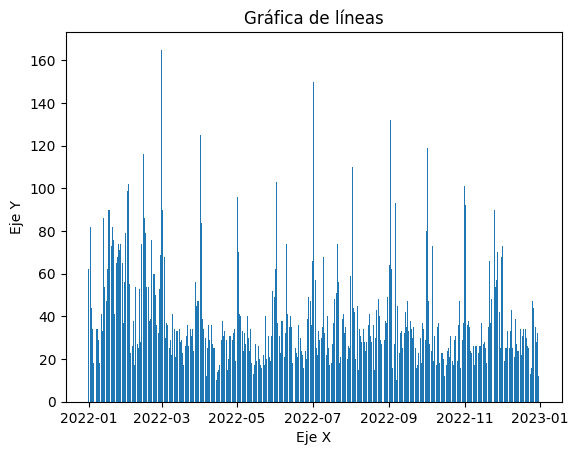

In [23]:
import matplotlib.pyplot as plt

# Crear la gráfica
plt.bar(v2['Diario'], v2['Pedidos'])

# Agregar título y etiquetas de eje
plt.title('Gráfica de líneas')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')





plt.show()

In [30]:
v2 = v2.applymap(lambda x: x.encode('utf-8') if isinstance(x, str) else x)

In [31]:
v2.to_csv('/Users/paulaalvarez/Desktop/2023_01_16_mis_versiones/4.Proyecto/sales_clean_3.csv', index=False)


In [32]:
%pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 6.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 KB 5.8 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [38]:
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='localhost',
                                         database='sex_toys_influence_sales',
                                         user='root',
                                         password='')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)
finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

Connected to MySQL Server version  8.0.32
You're connected to database:  ('sex_toys_influence_sales',)
MySQL connection is closed


/var/folders/01/wqv196rd4sx_rrnwlvh6ksq40000gn/T/ipykernel_11300/1089292831.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  v2.to_sql("sales", connection, if_exists="replace")


DatabaseError: Execution failed on sql 'SELECT name FROM sqlite_master WHERE type='table' AND name=?;': Not all parameters were used in the SQL statement

In [44]:
from sqlalchemy import create_engine

engine = create_engine('mysql:///sex_toys_influence_sales.db')

# Guarda el DataFrame en una tabla SQL
df.to_sql('table_name', engine, if_exists='replace')

ModuleNotFoundError: No module named 'MySQLdb'

In [42]:
%pip install sqlalchemy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 8.2 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
